## project development

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns           

In [130]:
data=pd.read_csv(r'/Users/ayanjana/Desktop/churn_prediction/saved_model/dataset/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [131]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [132]:
data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [133]:
data.duplicated().sum()


0

In [134]:
data.drop_duplicates(inplace=True)

In [135]:
data.drop(labels=['RowNumber','CustomerId','Surname'], axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
categorical_columns=data.select_dtypes(include='object').columns
numarical_column=data.select_dtypes(exclude='object').columns
print("categorical columns",categorical_columns)
print("numarical columns",numarical_column)

categorical columns Index(['Geography', 'Gender'], dtype='object')
numarical columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [137]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [138]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [139]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [140]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

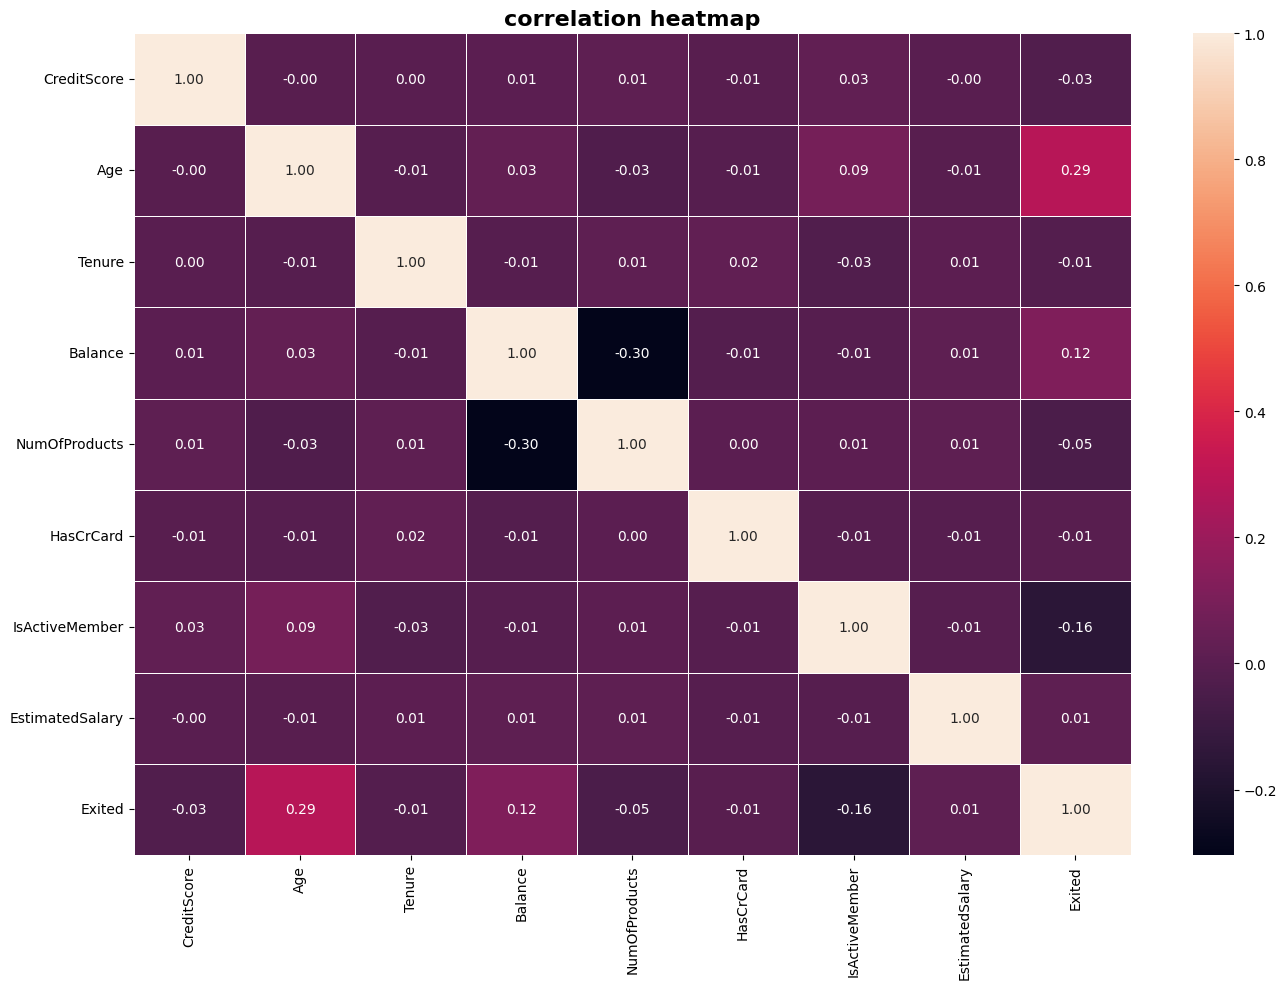

In [141]:
#correlation==>Heatmap
plt.figure(figsize=(14,10))
corr_matrix=data[numarical_column].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("correlation heatmap",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.show()

In [142]:
# dependent and independent features
y=data['Exited']
x=data.drop('Exited',axis=1)

In [143]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [144]:
categorical_columns=x.select_dtypes(include='object').columns
numarical_column=x.select_dtypes(exclude='object').columns
print("categorical columns",categorical_columns)
print("numarical columns",numarical_column)

categorical columns Index(['Geography', 'Gender'], dtype='object')
numarical columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [145]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [146]:
gender_cat=['Female', 'Male']

geo_cat=['France','Spain','Germany']

In [147]:
num_pipeline=Pipeline(steps=[('scaler',StandardScaler())])
cat_pipeline=Pipeline(steps=[('ordinalencoder',OrdinalEncoder(categories=[geo_cat,gender_cat]))])
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline,numarical_column ),
    ('cat_pipeline', cat_pipeline,categorical_columns )
])

In [148]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [149]:
# Applying the preprocessing pipelines to the training and testing data
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns= preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns= preprocessor.get_feature_names_out())

In [150]:
x_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


This uper code is common for everyone....

In [151]:
import pickle
with open("saved_model/preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

ANN IMPLEMENTATION


In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime


In [153]:
x_train.shape[1],

(10,)

In [154]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                704       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)


In [166]:
model.compile(optimizer=opt,
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
              )

In [167]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)

In [168]:
## Earlystopping
early_stopping_callback=EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [169]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 150,
    callbacks = [tensorflow_callback, early_stopping_callback]
)

Epoch 1/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8139 - val_loss: 0.3905 - val_accuracy: 0.8335
Epoch 2/150
250/250 [==============================] - 0s 673us/step - loss: 0.3801 - accuracy: 0.8462 - val_loss: 0.3573 - val_accuracy: 0.8510
Epoch 3/150
250/250 [==============================] - 0s 610us/step - loss: 0.3541 - accuracy: 0.8549 - val_loss: 0.3474 - val_accuracy: 0.8580
Epoch 4/150
250/250 [==============================] - 0s 613us/step - loss: 0.3439 - accuracy: 0.8586 - val_loss: 0.3464 - val_accuracy: 0.8575
Epoch 5/150
250/250 [==============================] - 0s 667us/step - loss: 0.3394 - accuracy: 0.8602 - val_loss: 0.3431 - val_accuracy: 0.8625
Epoch 6/150
250/250 [==============================] - 0s 696us/step - loss: 0.3353 - accuracy: 0.8612 - val_loss: 0.3483 - val_accuracy: 0.8550
Epoch 7/150
250/250 [==============================] - 0s 658us/step - loss: 0.3332 - accuracy: 0.8631 - val_loss: 0.3431 - val_accu

In [170]:
model.save("model.h5")

/Applications/anaconda3/envs/churn_env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [172]:
loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']


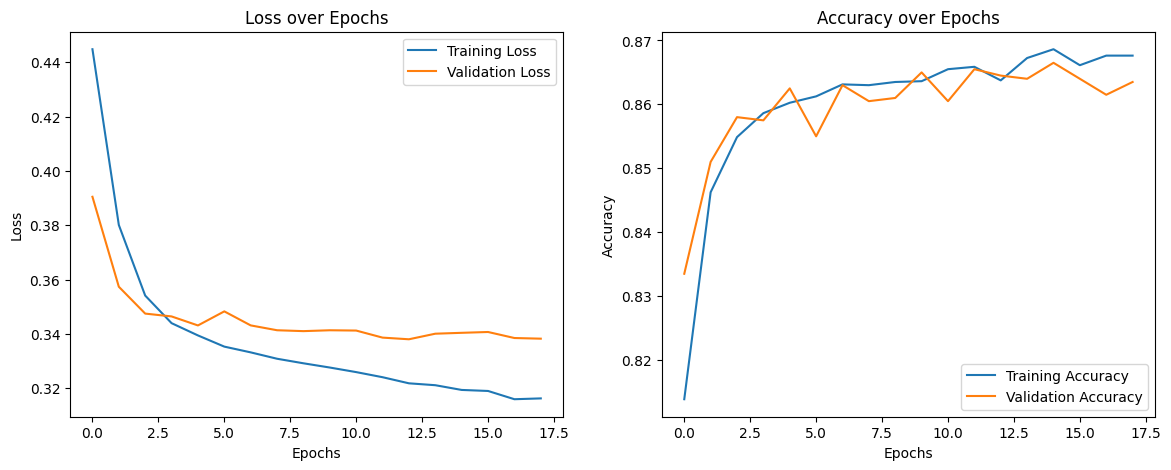

In [173]:
epochs = len(loss)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [176]:
##Load Tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [177]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 17003), started 0:00:11 ago. (Use '!kill 17003' to kill it.)